# Parkinson’s Disease (PD)

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.


## Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

## Parkinsons Disease Data Set

### Abstract: Oxford Parkinson's Disease Detection Dataset

---

- Data Set Characteristics: Multivariate
- Number of Instances: 197
- Area: Life
- Attribute Characteristics: Real
- Number of Attributes: 23
- Date Donated: 2008-06-26
- Associated Tasks: Classification
- Missing Values? N/A

-----------------------------------------------------	

### Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).

-----------------------------------------------------

### Attribute Information:

Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

-----------------------------------------------------

### Citation Request:

If you use this dataset, please cite the following paper: 
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1

- Load the dataset

In [2]:
df_file = pd.read_csv('parkinsons.data.csv')

### Step 2

- It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [3]:
print("Shape of dataset: ", df_file.shape)

df_file.head()

Shape of dataset:  (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
df_file.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
df_file.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [7]:
def breakNameColumn(df_input):
    #
    df_input["subjectId_recordingNumber"] = df_input["name"].str.split("_").str[2:].apply(lambda parts: "_".join(parts))
    print("Unique values in subjectId_recordingNumber: ", df_input["subjectId_recordingNumber"].nunique())

    # Drop the name column
    df_input.drop("name", axis=1, inplace=True)

    # Save the subjectId and recordingNumber into different columns
    df_input["subjectId"] = df_input["subjectId_recordingNumber"].str.split("_").str[:1].apply(
        lambda parts: "_".join(parts))
    df_input["recordingNumber"] = df_input["subjectId_recordingNumber"].str.split("_").str[1:].apply(
        lambda parts: "_".join(parts))

    # Change data type of recordingNumber
    df_input["recordingNumber"] = pd.to_numeric(df_input["recordingNumber"])

    # Reorder the columns. Bring the columns derived from name at the start
    df_input = df_input.reindex(
        columns=["subjectId_recordingNumber", "subjectId", "recordingNumber"] + list(df_input.columns[:-3]))
    
    #print(df_input.head())
    
    return df_input



In [8]:
# Call function breakNameColumn
df_file = breakNameColumn(df_file)

df_file.head()

Unique values in subjectId_recordingNumber:  195


,subjectId_recordingNumber,subjectId,recordingNumber,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01_1,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01_2,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01_3,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01_4,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01_5,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
df_file[["subjectId_recordingNumber", "subjectId", "recordingNumber"]].nunique()

subjectId_recordingNumber    195
subjectId                     32
recordingNumber                7
dtype: int64

In [10]:
# Reorder the columns. Bring the columns derived from name at the start

#df_file = df_file.reindex(
#    columns=["subjectId_recordingNumber", "subjectId", "recordingNumber"] + list(df_file.columns[:-3]))

In [11]:
df_file.head()

,subjectId_recordingNumber,subjectId,recordingNumber,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01_1,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01_2,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01_3,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01_4,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01_5,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
# Compare the frequencies - max, min and avg. Compare them to each other.

In [13]:
df_file["maxGtMin"] = df_file["MDVP:Fhi(Hz)"] >= df_file["MDVP:Flo(Hz)"] # Check if: Fhi > Flo
df_file["maxGtAvg"] = df_file["MDVP:Fhi(Hz)"] >= df_file["MDVP:Fo(Hz)"] # Check if: Fhi > Fo
df_file["avgGtMin"] = df_file["MDVP:Fo(Hz)"] >= df_file["MDVP:Flo(Hz)"] # Check if: Fo > Flo

# Check if all are True (only one value)
print(df_file[["maxGtMin", "maxGtAvg", "avgGtMin"]].nunique()) # Print the unique value counts in the new columns
df_file[["maxGtMin", "maxGtAvg", "avgGtMin"]].head() # Print sample value to check if they represent True

maxGtMin    1
maxGtAvg    1
avgGtMin    1
dtype: int64


,maxGtMin,maxGtAvg,avgGtMin
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True


In [14]:
# Drop the boolean columns
df_file.drop(["maxGtMin", "maxGtAvg", "avgGtMin"], axis=1, inplace=True)
df_file.head()

,subjectId_recordingNumber,subjectId,recordingNumber,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01_1,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01_2,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01_3,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01_4,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01_5,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<HTML>
    <FONT color = Darkblue>
        <b>Findings from describe(), head(), info(), nunique()</b><br>
        - 24 columns<br>
        - 23 of these columns are of type number<br>
        - One of these 23 number type columns is the target column containing the classification (column label: status)<br>
        - The data set contains 32 subject information<br>
        - The max number of recordings for a subject is 7<br>
    </FONT>
</HTML>

### Step 3

- Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

### Univariate analysis

#### Box plots

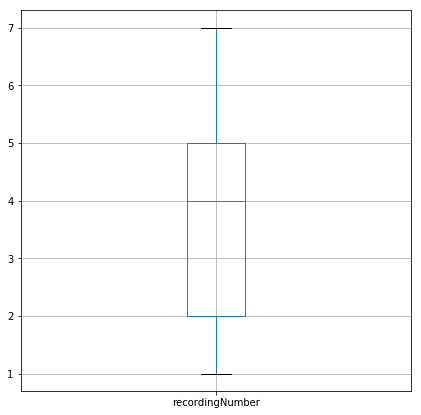

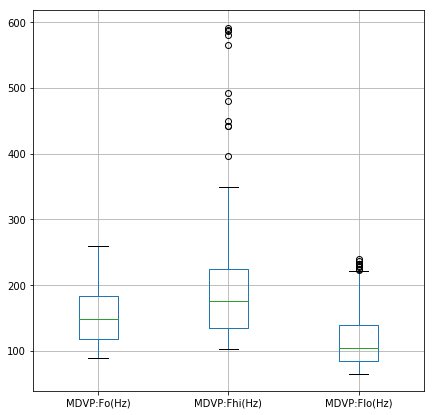

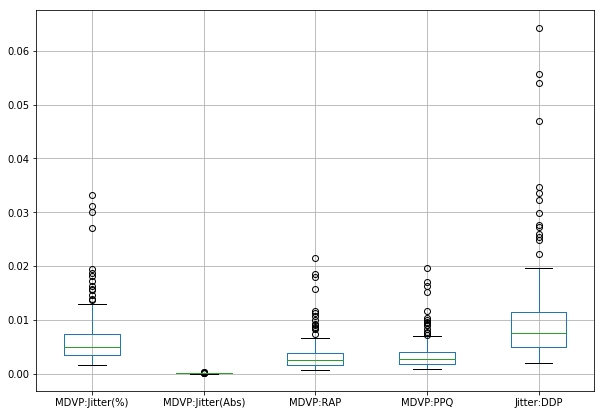

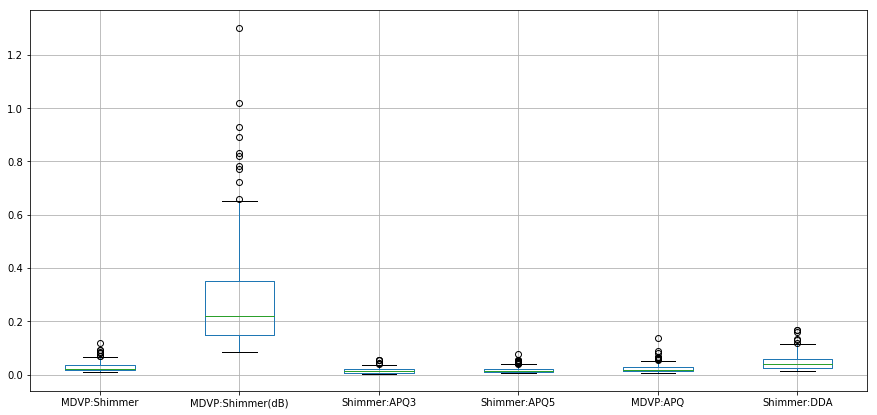

In [15]:
# Plot recordingNumber
plt.figure(figsize=[7,7])
df_file.boxplot(["recordingNumber"])

# Plot the average, minimum and maximum in the fundamental frequency
plt.figure(figsize=[7,7])
df_file.boxplot(["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)"])

# Plot measures of variation in the fundamental frequency
plt.figure(figsize=[10,7])
df_file.boxplot(["MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP"])

# Plot measures of variation in amplitude
plt.figure(figsize=[15,7])
df_file.boxplot(["MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA"])


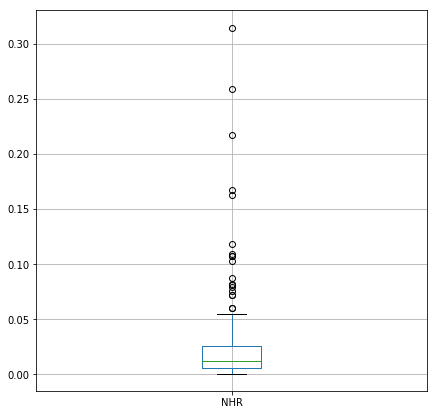

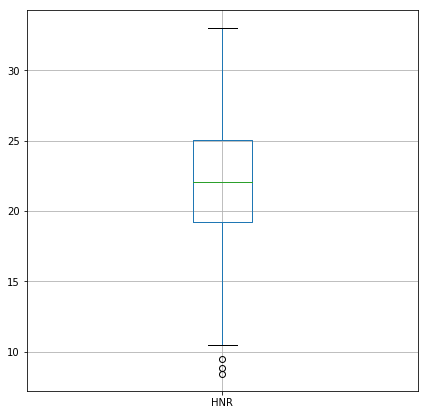

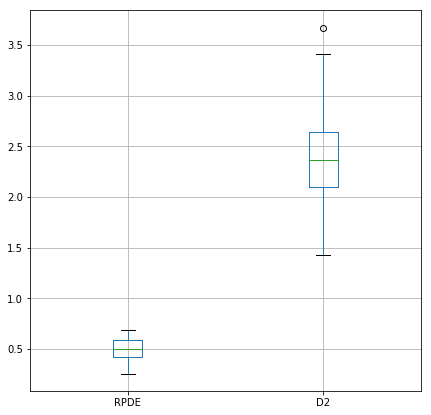

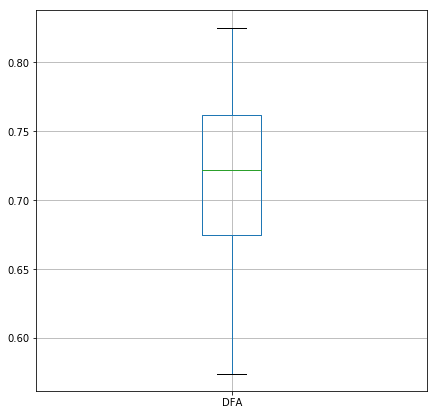

In [16]:
#
plt.figure(figsize=[7,7])
df_file.boxplot(["NHR"])


plt.figure(figsize=[7,7])
df_file.boxplot(["HNR"])

# Dynamical complexity measures
plt.figure(figsize=[7,7])
df_file.boxplot(["RPDE", "D2"])

# Signal fractal scaling exponent
plt.figure(figsize=[7,7])
df_file.boxplot(["DFA"])


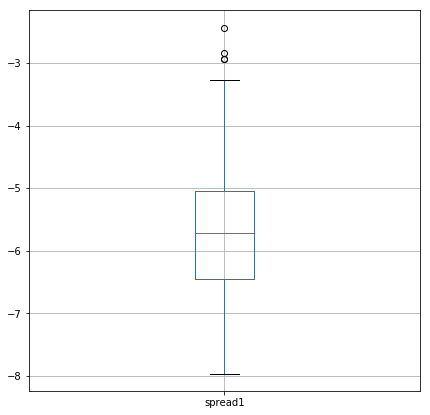

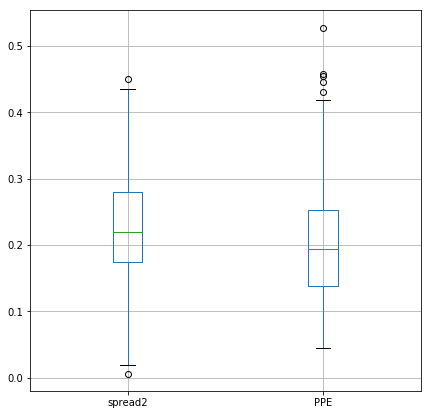

In [17]:
# Non linear measures of fundamental frequency variation
plt.figure(figsize=[7,7])
df_file.boxplot(["spread1"])

plt.figure(figsize=[7,7])
df_file.boxplot(["spread2", "PPE"])

#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252AF870668>,
      dtype=object)

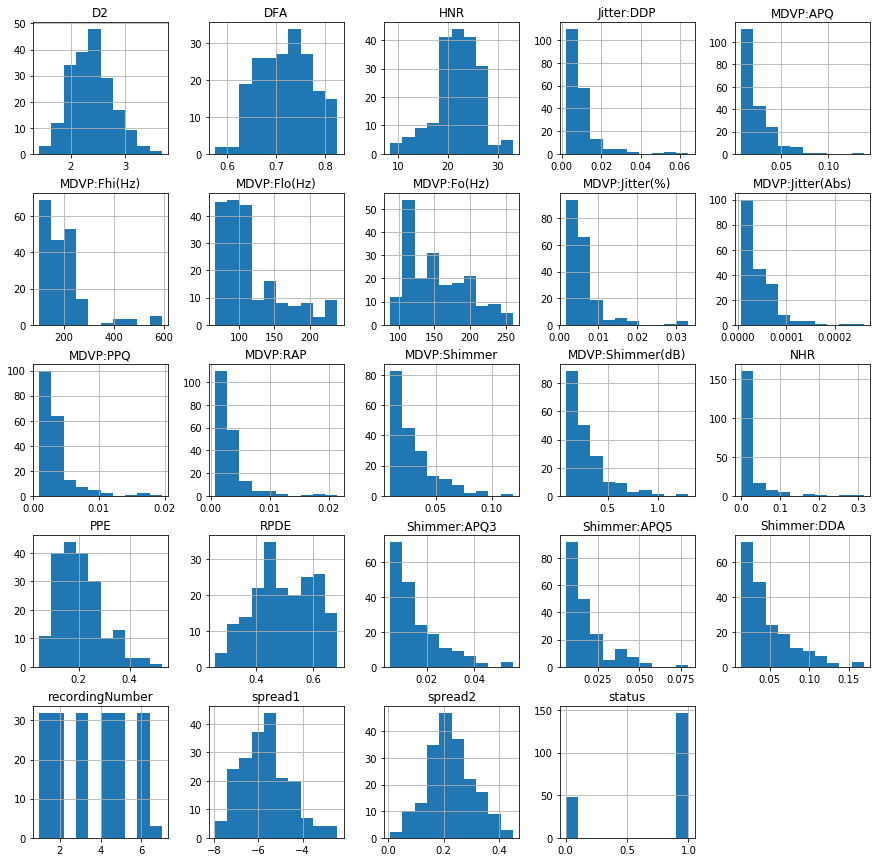

In [18]:
df_file.hist(figsize=[15,15])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252AF678B38>,
      dtype=object)

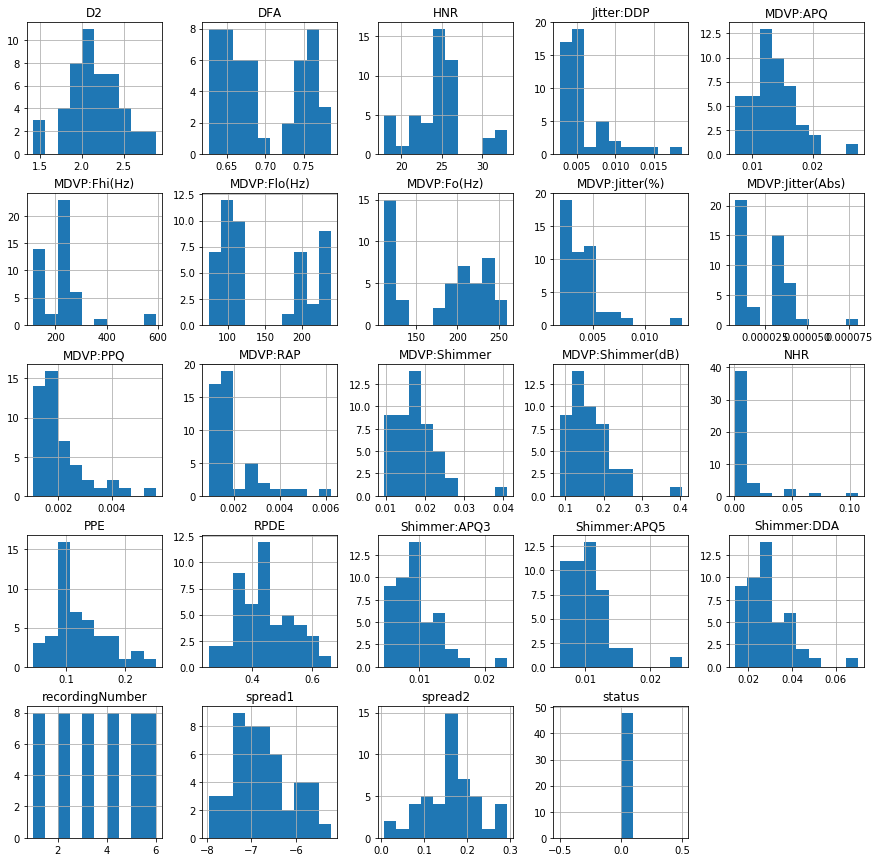

In [19]:
temp = df_file[df_file["status"] == 0]
temp.hist(figsize=[15,15])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252AFAD03C8>,
      dtype=object)

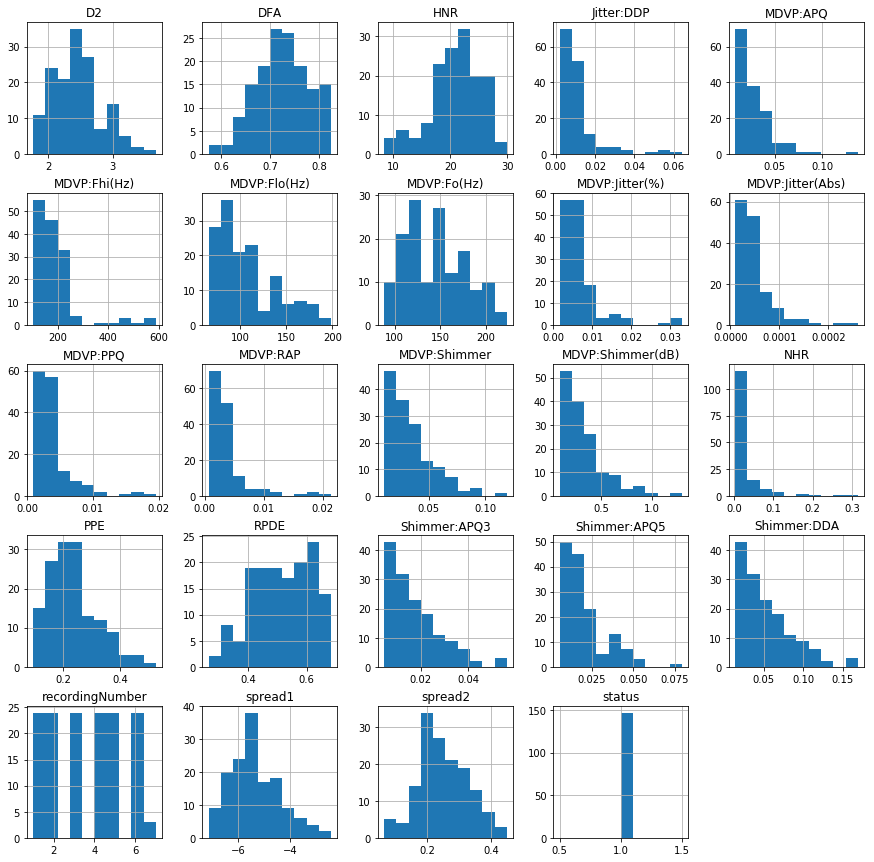

In [20]:
temp = df_file[df_file["status"] == 1]
temp.hist(figsize=[15,15])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Fo(Hz), dtype: object

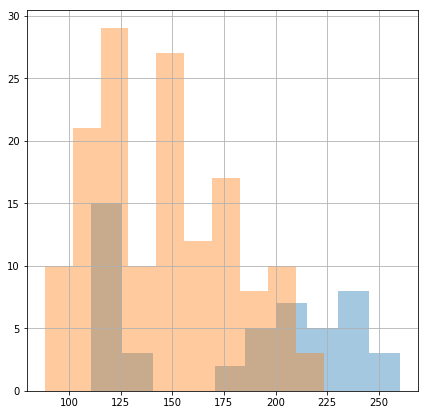

In [21]:
df_file.groupby("status")["MDVP:Fo(Hz)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Fhi(Hz), dtype: object

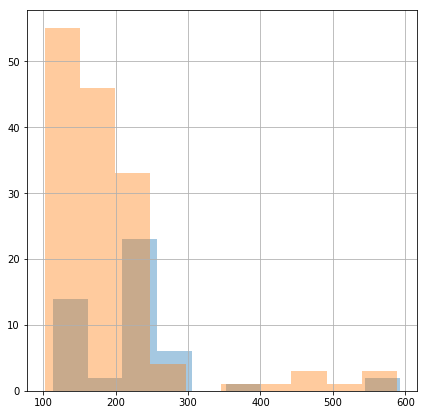

In [22]:
df_file.groupby("status")["MDVP:Fhi(Hz)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Flo(Hz), dtype: object

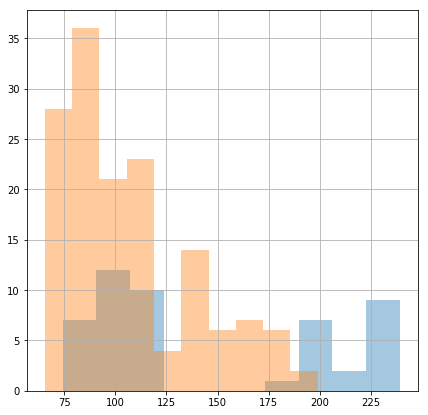

In [23]:
df_file.groupby("status")["MDVP:Flo(Hz)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Jitter(%), dtype: object

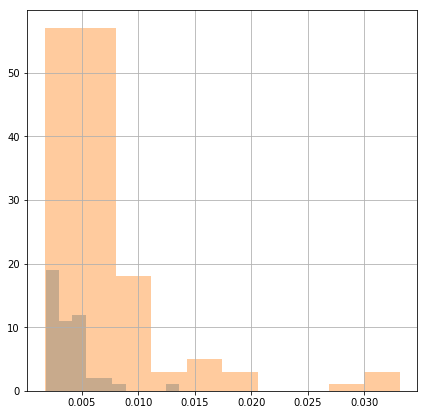

In [24]:
df_file.groupby("status")["MDVP:Jitter(%)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Jitter(Abs), dtype: object

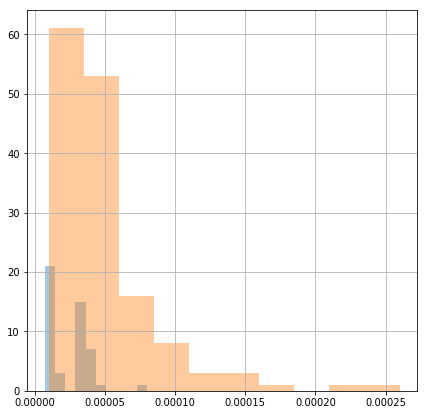

In [25]:
df_file.groupby("status")["MDVP:Jitter(Abs)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:RAP, dtype: object

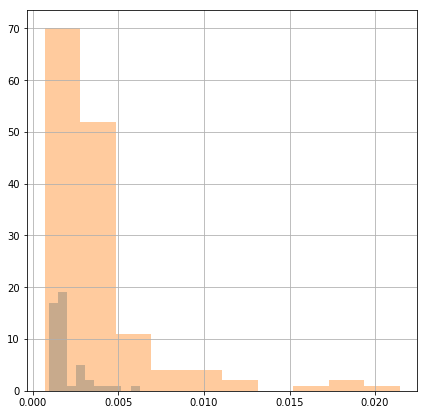

In [26]:
df_file.groupby("status")["MDVP:RAP"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:PPQ, dtype: object

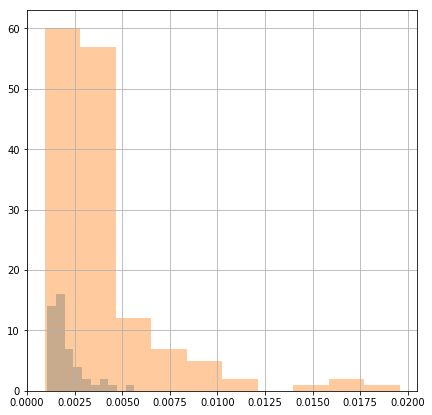

In [27]:
df_file.groupby("status")["MDVP:PPQ"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Jitter:DDP, dtype: object

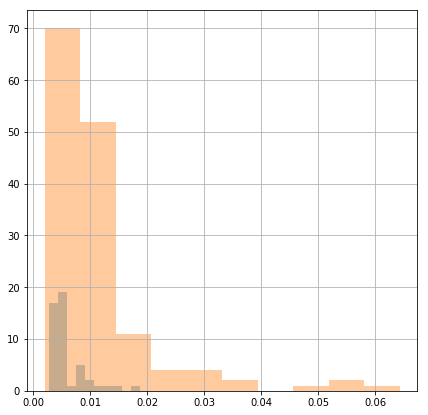

In [28]:
df_file.groupby("status")["Jitter:DDP"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Shimmer, dtype: object

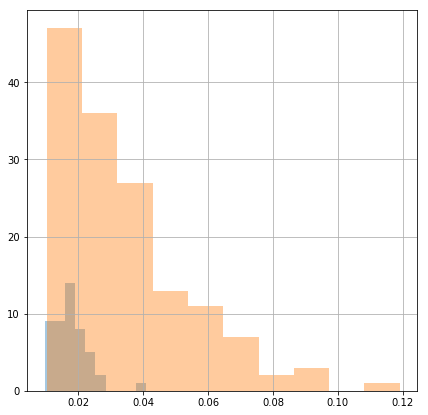

In [29]:
df_file.groupby("status")["MDVP:Shimmer"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:Shimmer(dB), dtype: object

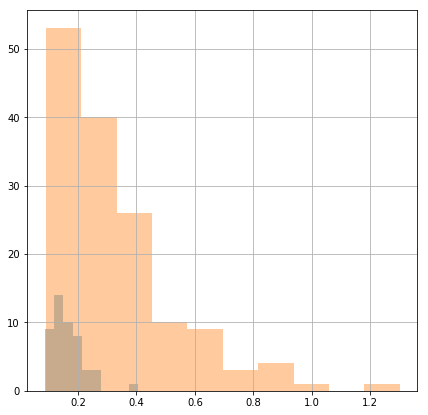

In [30]:
df_file.groupby("status")["MDVP:Shimmer(dB)"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Shimmer:APQ3, dtype: object

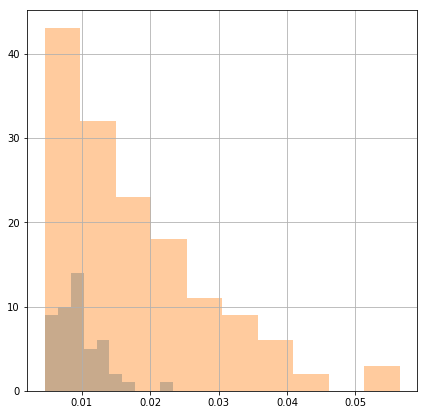

In [31]:
df_file.groupby("status")["Shimmer:APQ3"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Shimmer:APQ5, dtype: object

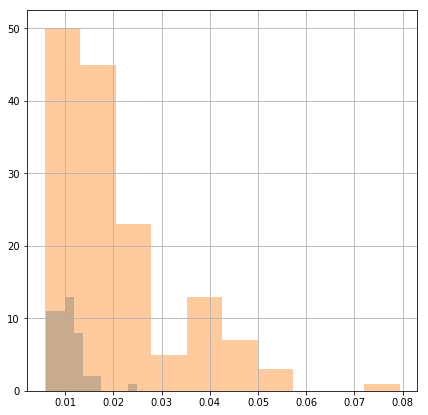

In [32]:
df_file.groupby("status")["Shimmer:APQ5"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDVP:APQ, dtype: object

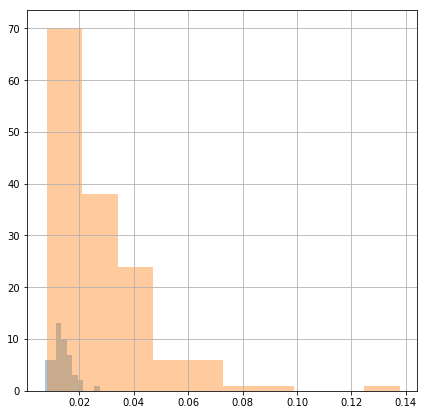

In [33]:
df_file.groupby("status")["MDVP:APQ"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Shimmer:DDA, dtype: object

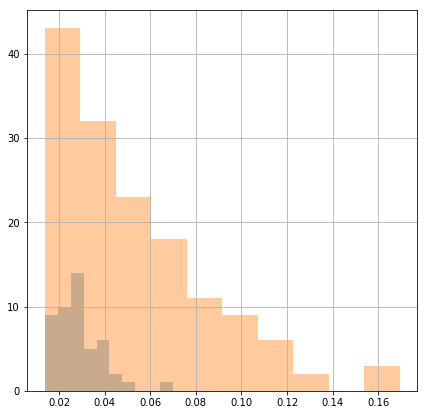

In [34]:
df_file.groupby("status")["Shimmer:DDA"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NHR, dtype: object

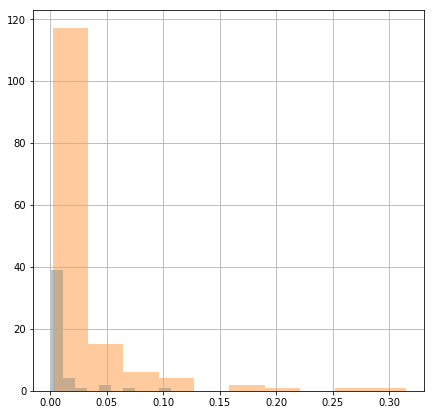

In [35]:
df_file.groupby("status")["NHR"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HNR, dtype: object

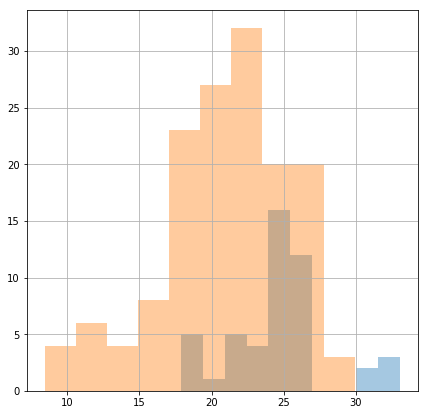

In [36]:
df_file.groupby("status")["HNR"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: RPDE, dtype: object

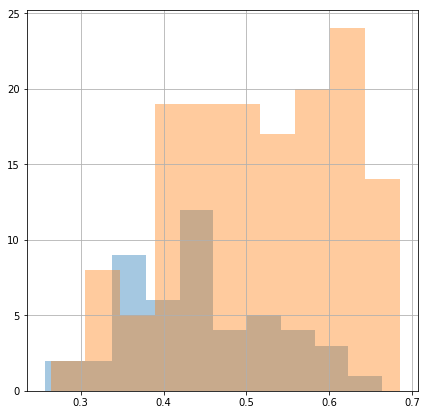

In [37]:
df_file.groupby("status")["RPDE"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: D2, dtype: object

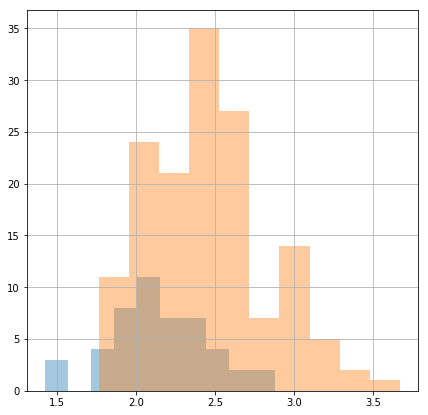

In [38]:
df_file.groupby("status")["D2"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DFA, dtype: object

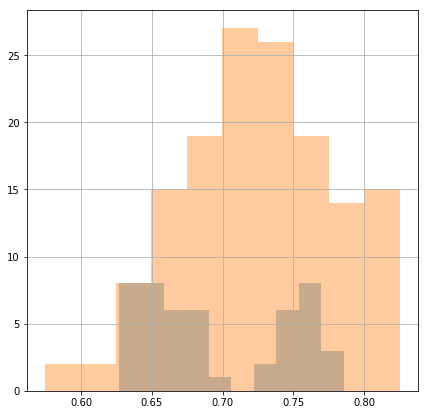

In [39]:
df_file.groupby("status")["DFA"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread1, dtype: object

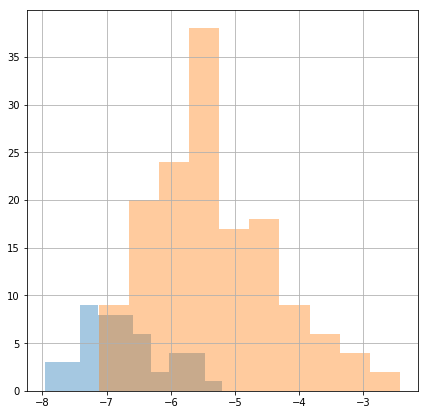

In [40]:
df_file.groupby("status")["spread1"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread2, dtype: object

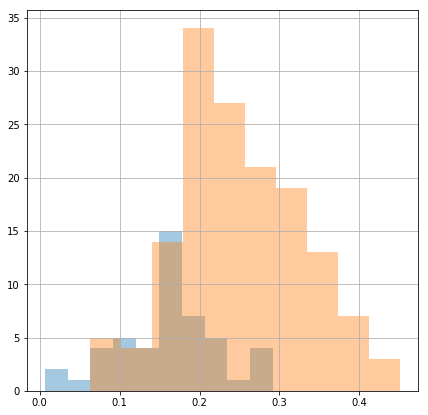

In [41]:
df_file.groupby("status")["spread2"].hist(alpha=0.4, figsize=[7,7])

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PPE, dtype: object

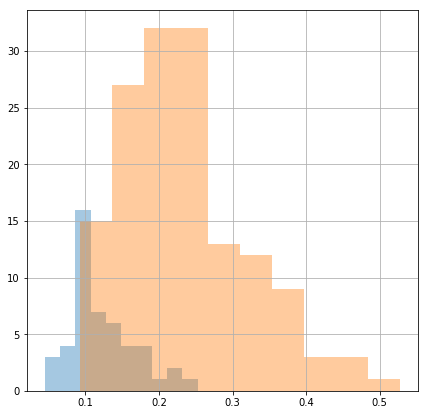

In [42]:
df_file.groupby("status")["PPE"].hist(alpha=0.4, figsize=[7,7])

#### Findings from univariate analysis
    - None

### Bivariate analysis

In [43]:
corr_df = df_file.corr()
corr_df

,recordingNumber,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
recordingNumber,1.000000,0.067744,0.086653,0.038533,0.091085,0.067336,0.092031,0.104406,0.092101,0.047758,...,0.050691,0.112997,-0.026764,0.017597,-0.032366,-0.064479,0.040841,0.033930,0.078840,0.048405
MDVP:Fo(Hz),0.067744,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.086653,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.038533,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),0.091085,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),0.067336,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,0.092031,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,0.104406,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,0.092101,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,0.047758,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771


In [44]:
# Define a function to find correlations higher than a given threshold
def correlationThresholdCutter(corr_data, threshold, targetLabel):
    #corr_threshold = 0.70;
    count = 0;
    if targetLabel == "":
        targetLabel == ""

    corr_threshold = threshold**2   # Square to get positive value for negative values as well
    count = 0

    for i in range(0, len(corr_data)):
        #for j in range(0, len(x_cor)):

        # X and Y axis columns are same. Limiting j to (i + 1) will only compare once between 2 columns.
        # Without this same columns will be compared twice.
        for j in range(0, i + 1):
            entry = corr_data.iloc[i, j]
            entry_squared = entry**2
            if(entry_squared >= corr_threshold):
                x_axis_col_lab = corr_data.index.values[i]
                y_axis_col_lab = corr_data.index.values[j]
                if x_axis_col_lab != y_axis_col_lab:
                    count = count + 1
                    if(x_axis_col_lab == targetLabel):
                        print("***", x_axis_col_lab, "*** corr with ", y_axis_col_lab, " is: ", entry)
                    elif y_axis_col_lab == targetLabel:
                        print(x_axis_col_lab, " corr with ***", y_axis_col_lab, "*** is: ", entry)
                    else:
                        print(x_axis_col_lab, " corr with ", y_axis_col_lab, " is: ", entry)
                    
    print("***")
    print("Number of relations with correlation higher than ", threshold, ": ", count)
    return


# Call the function

correlationThresholdCutter(corr_df, 0.999, "status")

Jitter:DDP  corr with  MDVP:RAP  is:  0.999999600104134
Shimmer:DDA  corr with  Shimmer:APQ3  is:  0.9999999636932829
***
Number of relations with correlation higher than  0.999 :  2


<HTML>
    <FONT color = Darkblue>
        <b>If 2 features have very high correlation value, then, probably one of them can be removed</b><br>
    </FONT>
</HTML>

- At 0.999 following relations exist
    - Jitter:DDP  corr with  MDVP:RAP  is:  0.999999600104134
    - Shimmer:DDA  corr with  Shimmer:APQ3  is:  0.9999999636932829

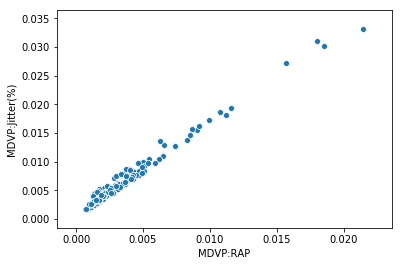

In [45]:
sns.scatterplot(df_file["MDVP:RAP"], df_file["MDVP:Jitter(%)"])

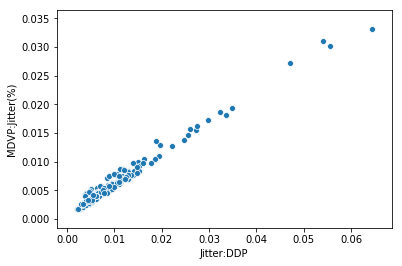

In [46]:
sns.scatterplot(df_file["Jitter:DDP"], df_file["MDVP:Jitter(%)"])

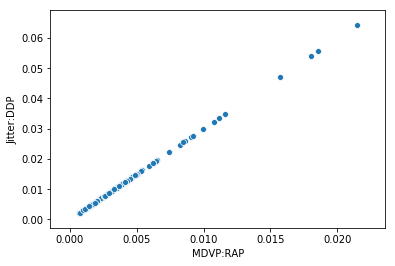

In [47]:
sns.scatterplot(df_file["MDVP:RAP"], df_file["Jitter:DDP"])

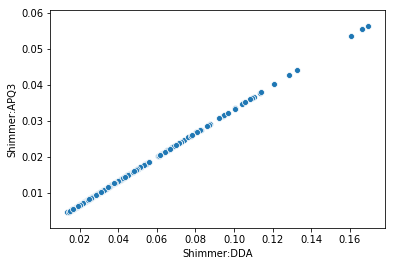

In [48]:
sns.scatterplot(df_file["Shimmer:DDA"], df_file["Shimmer:APQ3"])

<HTML>
    <FONT color = Darkblue>
        <b>Findings from bivariat analysis</b><br>
    </FONT>
</HTML>

- Following relations exist with correlation values higher than 0.999
    - Jitter:DDP  corr with  MDVP:RAP  is:  0.999999600104134
    - Shimmer:DDA  corr with  Shimmer:APQ3  is:  0.9999999636932829

### Step 4

- Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [231]:
# Read clean data (re-read will be required for debugging...
# scrolling to the top of this page and scrolling down will take more effore than this part of the code takes to execute)

df_file = pd.read_csv('parkinsons.data.csv')

# Process name column
df_file = breakNameColumn(df_file)

# Drop columns showing extremely high correlation (one of them)
df_file.drop(["Jitter:DDP", "Shimmer:DDA"], axis=1, inplace=True)

# drop names
df_file.drop(["subjectId_recordingNumber", "subjectId", "recordingNumber"], axis=1, inplace=True)

df_file.head()

Unique values in subjectId_recordingNumber:  195


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.04374,0.426,0.02182,...,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.06134,0.626,0.03134,...,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.05233,0.482,0.02757,...,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.05492,0.517,0.02924,...,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.06425,0.584,0.03490,...,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [52]:
X = df_file.drop(["status"], axis=1)
Y = df_file.status

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

#
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((136, 20), (59, 20), (136,), (59,))

### Step 5

- Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

<HTML>
    <FONT color = Darkblue>
        <b>Entropy is used in decision trees. Therefore, creating decisionTree model.</b><br>
    </FONT>
</HTML>

- Performance matrices to use will be
    - CONFUSION MATRIX OR CROSSTAB
        - Columns represent the actual value
        - Rows represent the predicted value
    - Recall value of data points belonging to status 1 (= correctly identified status 1/(Actual status 1))

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
# Function to evaluate the model and print accuracy score, confusion matrix and recall
def evaluateModel(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    acc_sco = accuracy_score(Y_test, Y_pred)
    #print("Accuracy scord: ", acc_sco)

    con_mat = confusion_matrix(Y_test, Y_pred)
    #con_mat = pd.crosstab(Y_test, Y_pred)
    #print("Confusion matrix:\n", con_mat)

    # Recall of the model (using confusion matrix values) for correctly identified status 1
    recall = con_mat[1,1]/(con_mat[1,1] + con_mat[0,1])
    #print("Recall: ", recall)
    
    return acc_sco, con_mat, recall, Y_pred


In [58]:
dtc = DecisionTreeClassifier()

accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)

### Step 6

- Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [59]:
print("Accuracy score: ", accuracy)
pd.crosstab(Y_test, Y_pred)

Accuracy score:  0.7457627118644068


col_0,0,1
status,,
0,13,5
1,10,31


### Step 7

- Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

<HTML>
    <FONT color = Darkblue>
        <b>Define function to find the value for max_depth at which the decision tree has the max recall on an average</b><br>
    </FONT>
</HTML>

In [61]:
# 
def optimumDepth(maxToTry, repeat):
    max_recall = 0
    max_recall_at = 0
    recall_df = pd.DataFrame(columns=["Depth", "Recall"])
    
    # Test different depth values
    for entry in range(2, maxToTry+1):  # Adding 1 because max value is not included in the range
        recall_summation = 0
        
        # For each depth, repeat the process
        for i in range(1, repeat+1):  # Adding 1 because max value is not included in the range
            
            # Create decision tree with max_depth set to the depth
            dtc = DecisionTreeClassifier(max_depth=entry)
            accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)
            recall_summation = recall_summation + recall
        
        # Check if this depth provided an average improvement in the recall
        recall_average = recall_summation/repeat
        if recall_average > max_recall:
            max_recall = recall_average
            max_recall_at = entry
        
        recall_df = recall_df.append(pd.Series([entry, recall_average], index=recall_df.columns), 
                                                 ignore_index=True)
    #print(depth_recall_df)
    return max_recall_at, max_recall, recall_df

In [100]:
max_depth_with_max_avg_recall, recall_avg, depth_recall_df = optimumDepth(20, 100)

print("Identified optimum value for max_depth: ", max_depth_with_max_avg_recall)
print("Average recall value at identified optimum max_depth: ", recall_avg)

depth_recall_df

Identified optimum value for max_depth:  3
Average recall value at identified optimum max_depth:  0.8604651162790717


,Depth,Recall
0,2.0,0.829787
1,3.0,0.860465
2,4.0,0.848423
3,5.0,0.854716
4,6.0,0.858602
5,7.0,0.859207
6,8.0,0.859397
7,9.0,0.859342
8,10.0,0.858962
9,11.0,0.859125


<HTML>
    <FONT color = Darkblue>
        <b>Define function to find the value for min_samples_leaf at which the decision tree has the max recall on an average</b><br>
    </FONT>
</HTML>

In [232]:
# 
def optimumMinLeaf(maxToTry, repeat):
    max_recall = 0
    max_recall_at = 0
    recall_df = pd.DataFrame(columns=["MinLeafSize", "Recall"])
    
    # Test different values
    for entry in range(2, maxToTry+1):  # Adding 1 because max value is not included in the range
        recall_summation = 0
        
        # For each value, repeat the process
        for i in range(1, repeat+1):  # Adding 1 because max value is not included in the range
            
            # Create decision tree with entry set in the model
            dtc = DecisionTreeClassifier(min_samples_leaf=entry)
            accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)
            recall_summation = recall_summation + recall
        
        # Check if this value provided an average improvement in the recall
        recall_average = recall_summation/repeat
        if recall_average > max_recall:
            max_recall = recall_average
            max_recall_at = entry
        
        recall_df = recall_df.append(pd.Series([entry, recall_average], index=recall_df.columns), 
                                                 ignore_index=True)
    #print(depth_recall_df)
    return max_recall_at, max_recall, recall_df

In [234]:
min_leaf_with_max_avg_recall, recall_avg, minLeaf_recall_df = optimumMinLeaf(20, 100)

print("Identified optimum value for min_samples_leaf: ", min_leaf_with_max_avg_recall)
print("Average recall value at identified optimum min_samples_leaf: ", recall_avg)

minLeaf_recall_df

Identified optimum value for min_samples_leaf:  15
Average recall value at identified optimum min_samples_leaf:  0.9473684210526304


,MinLeafSize,Recall
0,2.0,0.891626
1,3.0,0.849886
2,4.0,0.853067
3,5.0,0.844394
4,6.0,0.860465
5,7.0,0.860465
6,8.0,0.860465
7,9.0,0.860465
8,10.0,0.923077
9,11.0,0.923077


In [235]:
# Combine the identified max_depth and min_samples_leaf

In [238]:
dtc = DecisionTreeClassifier(max_depth=max_depth_with_max_avg_recall, min_samples_leaf=min_leaf_with_max_avg_recall)

accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)

recall

0.9473684210526315

<HTML>
    <FONT color = Darkblue>
        <b>Define function to find the value combination for max_depth and min_samples_leaf at which the decision tree has the max recall on an average</b><br>
    </FONT>
</HTML>

- Ranges to check
    - max_depth between 2 to 25
    - min_samples_leaf between 2 to 5

In [64]:
#
def optimumDepth_MinLeaf(depthLimit, leafSizeLimit, repeat):
    max_recall = 0
    max_recall_at_depth = 0
    max_recall_at_leafSize = 0
    recall_df = pd.DataFrame(columns=["Depth", "MinLeafSize", "Recall"])
    
    # Test different depth values
    for depth in range(2, depthLimit + 1):     # Adding 1 because max value in not included in the range
        
        for leafSize in range(2, leafSizeLimit+1):  # Adding 1 because max value is not included in the range
            recall_summation = 0

            # For each leaf size, repeat the process
            for i in range(1, repeat+1):  # Adding 1 because max value is not included in the range

                # Create decision tree with max_depth set to the depth
                dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leafSize)
                accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)
                recall_summation = recall_summation + recall

            # Check if this depth provided an average improvement in the recall
            recall_average = recall_summation/repeat
            if recall_average > max_recall:
                max_recall = recall_average
                max_recall_at_depth = depth
                max_recall_at_leafSize = leafSize

            recall_df = recall_df.append(pd.Series([depth, leafSize, recall_average], index=recall_df.columns), 
                                                     ignore_index=True)
    
    #print(depth_recall_df)
    return max_recall_at_depth, max_recall_at_leafSize, max_recall, recall_df

In [65]:
max_depth, min_samples_leaf, recall_avg, depth_leafSize_recall_df = optimumDepth_MinLeaf(25, 9, 500)

print("Optimum max_depth: ", max_depth)
print("Optimum min_samples_leaf: ", min_samples_leaf)
print("Recall average: ", recall_avg)


Optimum max_depth:  17
Optimum min_samples_leaf:  2
Recall average:  0.8914115024220296


In [76]:
#depth_leafSize_recall_df[depth_leafSize_recall_df.Recall <= 0.84]#.sort_values('Recall', ascending=False)

In [67]:
# depth_leafSize_recall_df[(depth_leafSize_recall_df.Depth == 10) 
#                          & (depth_leafSize_recall_df.MinLeafSize >= 2) 
#                          & (depth_leafSize_recall_df.MinLeafSize <= 4)]

In [68]:
# Create new column, in the recall df, containing the combination of depth and leaf size

depth_leafSize_recall_df['depth_minLeafSize'] = (
    depth_leafSize_recall_df.Depth.astype(int).astype(str) 
    + '' 
    + depth_leafSize_recall_df.MinLeafSize.astype(int).astype(str)).astype(int)

#depth_leafSize_recall_df

In [69]:
#depth_leafSize_recall_df.info()

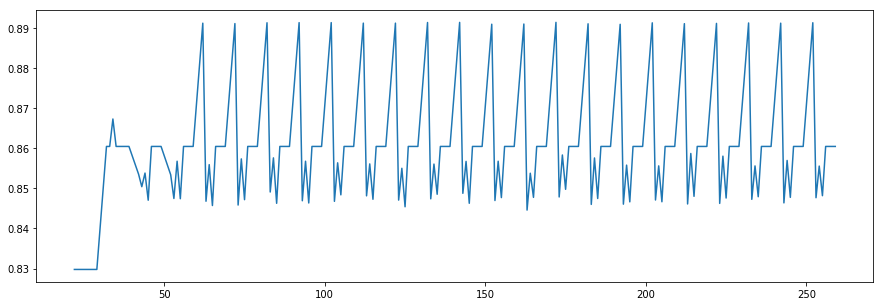

In [74]:
# Plot recall value on the new column
plt.figure(figsize=[15,5])
plt.plot(depth_leafSize_recall_df.depth_minLeafSize, depth_leafSize_recall_df.Recall)

#ax = plt.gca()
#ax.set_ylim([0.82, 0.85])  # Show y axis between the given range
#ax.set_xlim([200, 270])  # Show x axis between the given range

plt.show()

In [71]:
### The optimal min_samples_leaf is between 2 to 4

In [98]:
dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=6)

accuracy, confusion_mat, recall, Y_pred = evaluateModel(dtc, X_train, Y_train, X_test, Y_test)

recall

0.8974358974358975

### Step 8

- Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

<HTML>
    <FONT color = Darkblue>
        <h2>SUMMARY: Following is attempted to find the optimal number of trees</h2><br>
    </FONT>
</HTML>

- Try to find the optimum number of trees (averaging over random_state)
- Try to find the optimum number of trees over kfold (on fixed value of random_state)
- Write logic to find the best random_state combination for creating RandomForest and kfold model
- Create a kFold-RandomForest model using the identified optimum value of random_state and the tree count
- Get prediction on complete data set using the model created above

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=0)

accuracy, confusion_mat, recall, Y_pred = evaluateModel(rfc, X_train, Y_train, X_test, Y_test)

print("Accuracy of random forest: ", accuracy)
print("Confusion matrix: \n", confusion_mat)
print("Recall: ", recall)

Accuracy of random forest:  0.9152542372881356
Confusion matrix: 
 [[14  4]
 [ 1 40]]
Recall:  0.9090909090909091


<HTML>
    <FONT color = Darkblue>
        <b>Try to find the optimum number of trees (averaging over random_state)</b><br>
    </FONT>
</HTML>

In [154]:
# Define function to find the optimum value for the number of trees in the Random Forest that will give the best result
def optimumTreeNumbers(maxToTry, repeat):
    max_recall = 0
    max_recall_at = 0
    recall_df = pd.DataFrame(columns=["NumberOfTrees", "Recall"])
    
    # Test different values
    for entry in range(1, maxToTry+1):  # Adding 1 because max value is not included in the range
        recall_summation = 0
        
        # For each leaf size, repeat the process
        for i in range(1, repeat+1):  # Adding 1 because max value is not included in the range
            # Create random forest model with the given number of trees
            rfc = RandomForestClassifier(n_jobs=2, n_estimators=entry, criterion="entropy")
            accuracy, confusion_mat, recall, Y_pred = evaluateModel(rfc, X_train, Y_train, X_test, Y_test)
            recall_summation = recall_summation + recall
        
        # Check if this depth provided an average improvement in the recall
        recall_average = recall_summation/repeat
        if recall_average > max_recall:
            max_recall = recall_average
            max_recall_at = entry
        
        print("In ", entry, " trees, the random forest model gives average recall of ", recall, " in ", i, " repititions")
        
        recall_df = recall_df.append(pd.Series([entry, recall_average], index=recall_df.columns), 
                                                 ignore_index=True)
        
    return max_recall_at, max_recall, recall_df

In [155]:
max_recall_of_rfc_at, max_recall_of_rfc, recall_df = optimumTreeNumbers(50, 10)

print("Max recall of random forest model is at: ", max_recall_of_rfc_at)
print("Max recall of random forest model is: ", max_recall_of_rfc)

recall_df

In  1  trees, the random forest model gives average recall of  0.7692307692307693  in  10  repititions
In  2  trees, the random forest model gives average recall of  0.896551724137931  in  10  repititions
In  3  trees, the random forest model gives average recall of  0.8604651162790697  in  10  repititions
In  4  trees, the random forest model gives average recall of  0.8536585365853658  in  10  repititions
In  5  trees, the random forest model gives average recall of  0.8974358974358975  in  10  repititions
In  6  trees, the random forest model gives average recall of  0.8918918918918919  in  10  repititions
In  7  trees, the random forest model gives average recall of  0.8444444444444444  in  10  repititions
In  8  trees, the random forest model gives average recall of  0.875  in  10  repititions
In  9  trees, the random forest model gives average recall of  0.9047619047619048  in  10  repititions
In  10  trees, the random forest model gives average recall of  0.9047619047619048  in 

,NumberOfTrees,Recall
0,1.0,0.849900
1,2.0,0.926833
2,3.0,0.890650
3,4.0,0.890082
4,5.0,0.868497
5,6.0,0.893960
6,7.0,0.884726
7,8.0,0.907810
8,9.0,0.886235
9,10.0,0.910051


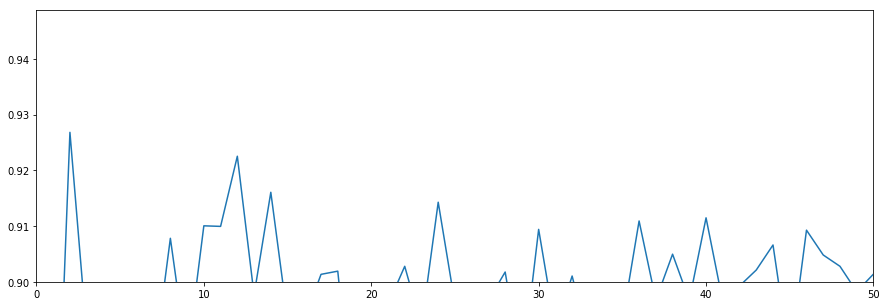

In [158]:
plt.figure(figsize=[15,5])
plt.plot(recall_df.NumberOfTrees, recall_df.Recall)

ax=plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([0.90, 0.9488])

plt.show()

By above method, the optimal number of trees would be either 2

In [159]:
rfc = RandomForestClassifier(n_jobs=2, n_estimators=max_recall_of_rfc_at, criterion="entropy", random_state=0)

accuracy, confusion_mat, recall, Y_pred = evaluateModel(rfc, X_train, Y_train, X_test, Y_test
print("Accuracy of random forest: ", accuracy)
print("Confusion matrix: \n", confusion_mat)
print("Recall: ", recall)

Accuracy of random forest:  0.711864406779661
Confusion matrix: 
 [[15  3]
 [14 27]]
Recall:  0.9


In [161]:
# Read clean data
df_file = pd.read_csv('parkinsons.data.csv')

# Process name column
df_file = breakNameColumn(df_file)

# Drop columns showing extremely high correlation (one of them)
df_file.drop(["Jitter:DDP", "Shimmer:DDA"], axis=1, inplace=True)
# drop names
df_file.drop(["subjectId_recordingNumber", "subjectId", "recordingNumber"], axis=1, inplace=True)

df_file.head()

Unique values in subjectId_recordingNumber:  195


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.04374,0.426,0.02182,...,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.06134,0.626,0.03134,...,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.05233,0.482,0.02757,...,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.05492,0.517,0.02924,...,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.06425,0.584,0.03490,...,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [128]:
# Apply Kfold on the Random forest model for each number of trees

In [140]:
from sklearn.model_selection import KFold

In [195]:
# Function to apply k-mean score on input data
def kFoldRandomForest(model, X_all, Y_all, k, random_state):
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)
    #kfold = KFold(n_splits=k, shuffle=True)
    confusion_matrix_agg = np.array([[0,0], [0,0]])
    for train, test in kfold.split(X_all):
        model.fit(X_all.iloc[train], Y_all.iloc[train])
        Y_pred = model.predict(X_all.iloc[test])
        matrix = confusion_matrix(Y_all.iloc[test], Y_pred)
        confusion_matrix_agg = np.add(confusion_matrix_agg, matrix)
    
    # Calculate the recall from the confusion_matrix_agg
    recall = confusion_matrix_agg[1,1]/(confusion_matrix_agg[1,1] + confusion_matrix_agg[0,1])
    
    return recall

In [172]:
X = df_file.drop(["status"], axis=1)
Y = df_file.status

In [174]:
recall = kFoldRandomForest(rfc, X, Y, 10, 0)
recall

0.959349593495935

<HTML>
    <FONT color = Darkblue>
        <b>Try to find the optimum number of trees over kfold (on fixed value of random_state)</b><br>
    </FONT>
</HTML>

In [196]:
def find_optimumTreeNumber_for_kfold(minNumToCheck, maxNumToCheck, repeat, X_all, Y_all, k, 
                                     random_state_rfc, random_state_kfold):
    
    max_recall = 0
    max_recall_at = 0
    recall_df = pd.DataFrame(columns=["NumberOfTrees", "Recall"])
    
    for i in range(minNumToCheck, maxNumToCheck):
        recall_summation = 0
        
        for j in range(1, repeat+1):
            rfc = RandomForestClassifier(n_jobs=2, n_estimators=i, criterion="entropy", random_state=random_state_rfc)
            recall = kFoldRandomForest(rfc, X_all, Y_all, k, random_state_kfold)
            recall_summation = recall_summation + recall
        
        recall_average = recall_summation/repeat
        recall_df = recall_df.append(pd.Series([i, recall_average], index=recall_df.columns), 
                                                 ignore_index=True)
        
        if recall_average > max_recall:
            max_recall = recall_average
            max_recall_at = i
    
    return max_recall_at, max_recall, recall_df

In [201]:
minTrees = 1
maxTrees = 10
repeatTimes = 1
k = 10
random_state_rfc = 1
random_state_kfold = 1

max_recall_numberOfTrees, max_recall, recall_df = find_optimumTreeNumber_for_kfold(minTrees, maxTrees, repeatTimes, 
                                                                                   X, Y, k, random_state_rfc, 
                                                                                  random_state_kfold)

print("Max recall at: ", max_recall_numberOfTrees)
print("Max recall: ", max_recall)


recall_df

Max recall at:  2
Max recall:  0.9224806201550387


,NumberOfTrees,Recall
0,1.0,0.900662
1,2.0,0.922481
2,3.0,0.900662
3,4.0,0.921429
4,5.0,0.908497
5,6.0,0.912162
6,7.0,0.909091
7,8.0,0.906667
8,9.0,0.898734


<HTML>
    <FONT color = Darkblue>
        <b>Write logic to find the best random_state combination for creating RandomForest and kfold model</b><br>
    </FONT>
</HTML>

In [229]:
#
def optimumRandomState(minTrees, maxTrees, repeatTimes, k, random_state_max):
    
    recall_df = pd.DataFrame(columns=["random_state_rfc", "random_state_kfold", "recall", "treeNumber"])
    max_recall = 0
    max_recall_rfc_at = 0
    max_recall_kfold_at = 0
    max_recall_treeNum_at = 0
    
    # random_state to use for randomforest object
    for random_state_rfc in range(0, random_state_max+1):
        
        # random_state to use for kfold
        for random_state_kfold in range(0, random_state_max+1):
            
            #
            max_recall_numberOfTrees, recall, recall_df_xyz = find_optimumTreeNumber_for_kfold(
                minTrees, maxTrees, repeatTimes, X, Y, k, random_state_rfc, random_state_kfold)
            
            #
            recall_df = recall_df.append(pd.Series([random_state_rfc, random_state_kfold, recall, max_recall_numberOfTrees], 
                                                   index=recall_df.columns), ignore_index=True)
            # 
            if recall > max_recall:
                max_recall = recall
                max_recall_rfc_at = random_state_rfc
                max_recall_kfold_at = random_state_kfold
                max_recall_treeNum_at = max_recall_numberOfTrees
                        
    return max_recall_rfc_at, max_recall_kfold_at, max_recall_treeNum_at, max_recall, recall_df

In [215]:
minTrees = 1
maxTrees = 10
repeatTimes = 1
k = 10
max_random_state = 10

opt_random_state_rfc, opt_random_state_kfold, opt_treeNum, recall, recall_df = optimumRandomState(
    minTrees, maxTrees, repeatTimes, k, max_random_state)

print("random_state_rfc: ", opt_random_state_rfc)
print("random_state_kfold: ", opt_random_state_kfold)
print("Tree number: ", opt_treeNum)
print("Recall: ", recall)

recall_df

# While checking in the range of 0 to 10, the optimum value for random_state is as follows
    # 1 for random forest classifier random_state
    # 7 for kfold random_state
    # 2 was the optimum number of tree count in above random settings

random_state_rfc:  1
random_state_kfold:  7
Tree number:  2
Recall:  0.9763779527559056


,random_state_rfc,random_state_kfold,recall,treeNumber
0,0.0,0.0,0.959350,2.0
1,0.0,1.0,0.961240,2.0
2,0.0,2.0,0.924242,2.0
3,0.0,3.0,0.944882,2.0
4,0.0,4.0,0.934211,9.0
5,0.0,5.0,0.924242,2.0
6,0.0,6.0,0.946970,2.0
7,0.0,7.0,0.938931,2.0
8,0.0,8.0,0.934783,2.0
9,0.0,9.0,0.935252,4.0


In [216]:
# Read clean data
df_file = pd.read_csv('parkinsons.data.csv')

# Process name column
df_file = breakNameColumn(df_file)

# Drop columns showing extremely high correlation (one of them)
df_file.drop(["Jitter:DDP", "Shimmer:DDA"], axis=1, inplace=True)
# drop names
df_file.drop(["subjectId_recordingNumber", "subjectId", "recordingNumber"], axis=1, inplace=True)

X = df_file.drop(["status"], axis=1)
Y = df_file.status

Unique values in subjectId_recordingNumber:  195


In [220]:
# Find optimum number of trees in random forest with following random_states
    # random_state_rfc = 1
    # random_state_kfold = 7
minTrees = 1
maxTrees = 100
repeatTimes = 1
k = 10
random_state_rfc = 1
random_state_kfold = 7
max_recall_numberOfTrees, recall, recall_df_xyz = find_optimumTreeNumber_for_kfold(
                minTrees, maxTrees, repeatTimes, X, Y, k, random_state_rfc, random_state_kfold)

print("Optimum number of trees: ", max_recall_numberOfTrees)
print("Recall: ", recall)

recall_df_xyz

Optimum number of trees:  2
Recall:  0.9763779527559056


,NumberOfTrees,Recall
0,1.0,0.898649
1,2.0,0.976378
2,3.0,0.913907
3,4.0,0.950000
4,5.0,0.910256
5,6.0,0.927152
6,7.0,0.915584
7,8.0,0.926667
8,9.0,0.916129
9,10.0,0.921569


<HTML>
    <FONT color = Darkblue>
        <b>Create a kFold-RandomForest model using the identified optimum value combinations between random_state and the tree count</b><br>
    </FONT>
</HTML>

- The optimum number of trees is 2
- The optimum random_state is 1 for randomforestclassifier
- The optimum random_state is 7 for kfold

In [239]:
k = 10
random_state_rfc = 1
random_state_kfold = 7
rfc_treeNum = 2

rfc = RandomForestClassifier(n_jobs=2, n_estimators=rfc_treeNum, criterion="entropy", random_state=random_state_rfc)

kfold = KFold(n_splits=k, shuffle=True, random_state=random_state_kfold)

confusion_matrix_agg = np.array([[0,0], [0,0]])
    
for train, test in kfold.split(X):
    rfc.fit(X.iloc[train], Y.iloc[train])
    Y_pred = rfc.predict(X.iloc[test])
    matrix = confusion_matrix(Y.iloc[test], Y_pred)
    confusion_matrix_agg = np.add(confusion_matrix_agg, matrix)
    
# Calculate the recall from the confusion_matrix_agg
recall = confusion_matrix_agg[1,1]/(confusion_matrix_agg[1,1] + confusion_matrix_agg[0,1])

print("Recall: ", recall)
print("Confusion matrix: \n", confusion_matrix_agg)

Recall:  0.9763779527559056
Confusion matrix: 
 [[ 45   3]
 [ 23 124]]


<HTML>
    <FONT color = Darkblue>
        <b>Get prediction on complete data set using the model created above</b><br>
    </FONT>
</HTML>

In [240]:
# Get prediction on complete data set
y_pred = rfc.predict(X)
matrix = confusion_matrix(Y, y_pred)

recall_all = matrix[1,1]/(matrix[1,1] + matrix[0,1])

print("Recall: ", recall_all)
print("Confusion matrix: \n", matrix)

Recall:  0.9733333333333334
Confusion matrix: 
 [[ 44   4]
 [  1 146]]
